<a href="https://colab.research.google.com/github/tomonari-masada/course2023-intro2ml/blob/main/10_logistic_regression_(in_class).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ロジスティック回帰
* 線形回帰を少し変えれば、２値分類に使うこともできるようになる。
* 線形モデルの出力を、シグモイド関数と呼ばれる関数で$[0,1]$の範囲の値へ変換する。
* 目的変数の値が0のときは、0に近い値が出力されるように、また・・・
* 目的変数の値が1のときは、1に近い値が出力されるように、モデルの学習を行う。

## シグモイド関数
$$ \sigma(s) = \frac{1}{1 + e^{- s}} $$
* 正確には、ロジスティック関数と呼ばれる。
* シグモイド関数のひとつとしてロジスティック関数がある、ということ。だが・・・
* シグモイド関数という呼び名の方が広く流通している感じ。
 * https://en.wikipedia.org/wiki/Sigmoid_function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

* シグモイド関数の値（縦軸の値）が0から1の範囲に収まっていることを確認してみる。

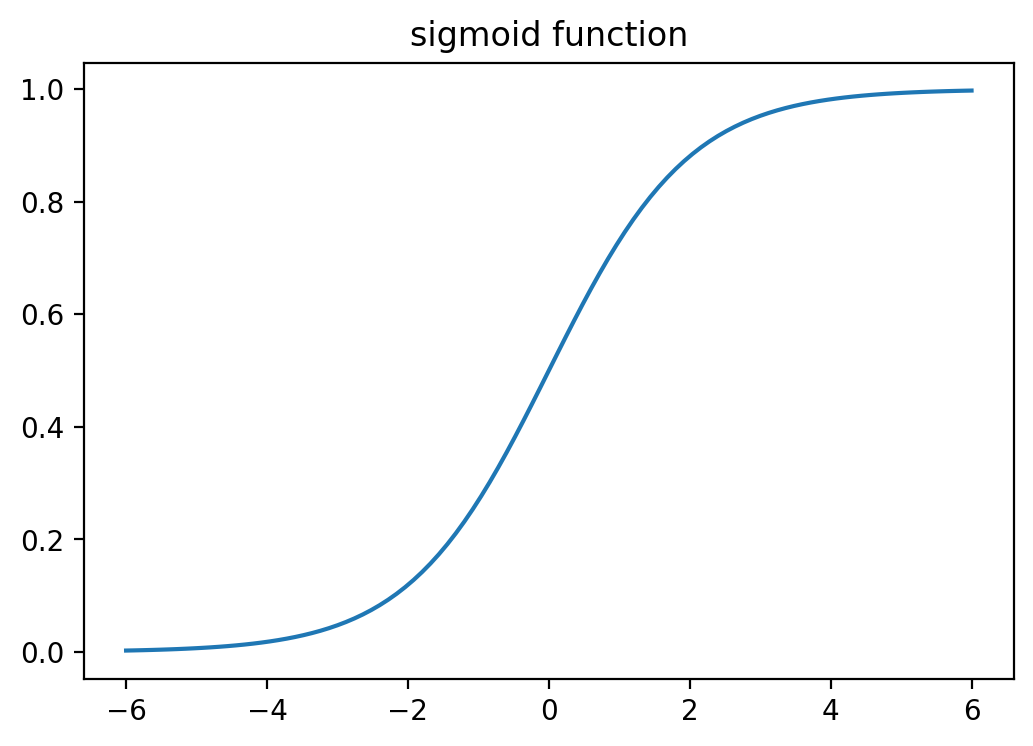

In [ ]:
x = np.linspace(-6, 6, 101)
y = 1 / (1 + np.exp( - x))
fig = plt.figure(figsize=(6,4))
plt.plot(x, y)
plt.title('sigmoid function')
plt.show()

## toy dataでロジスティック回帰の使い方を把握

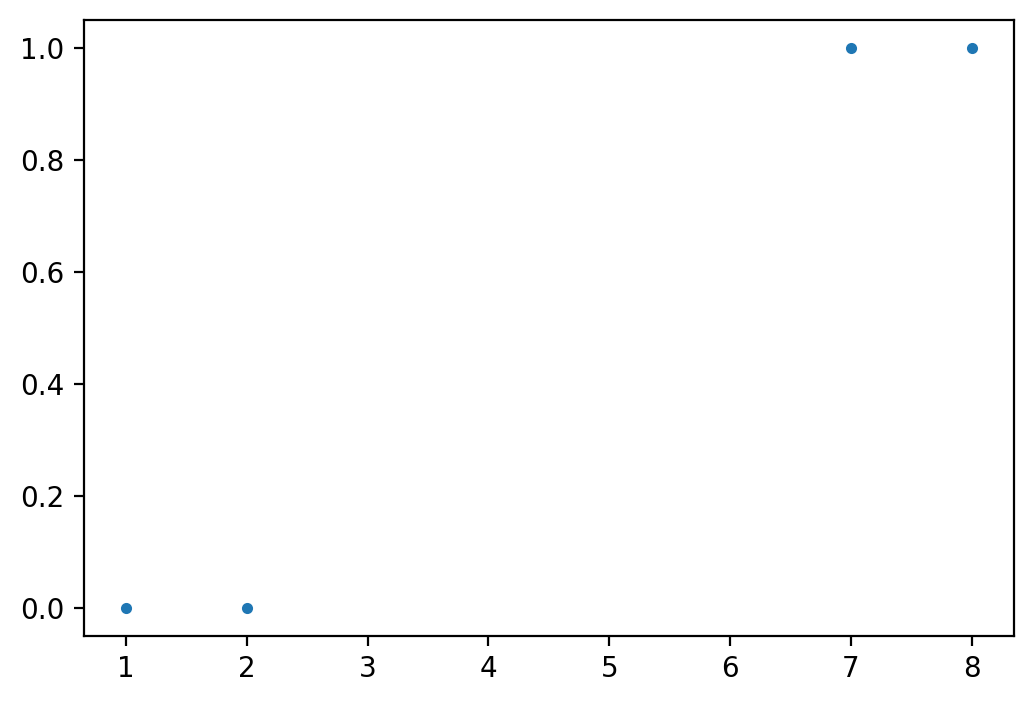

In [ ]:
fig = plt.figure(figsize=(6,4))
x = [1, 2, 7, 8]
y = [0, 0, 1, 1]
plt.plot(x, y, '.')
plt.show()

In [2]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [ ]:
clf.fit(x, y)

ValueError: ignored

In [ ]:
x = np.array(x).reshape(-1, 1)
print(x)

[[1]
 [2]
 [7]
 [8]]


In [ ]:
clf.fit(x, y)

LogisticRegression()

In [ ]:
a = clf.coef_
b = clf.intercept_
print(a, b)

[[0.85714952]] [-3.85738729]


* どのような関数が、２値分類を実現する関数として推定されたのか、描いてみる。

In [ ]:
clf.predict_proba([[3.0]]) # proba = probability

array([[0.78345898, 0.21654102]])

In [ ]:
clf.predict([[3.0]])

array([0])

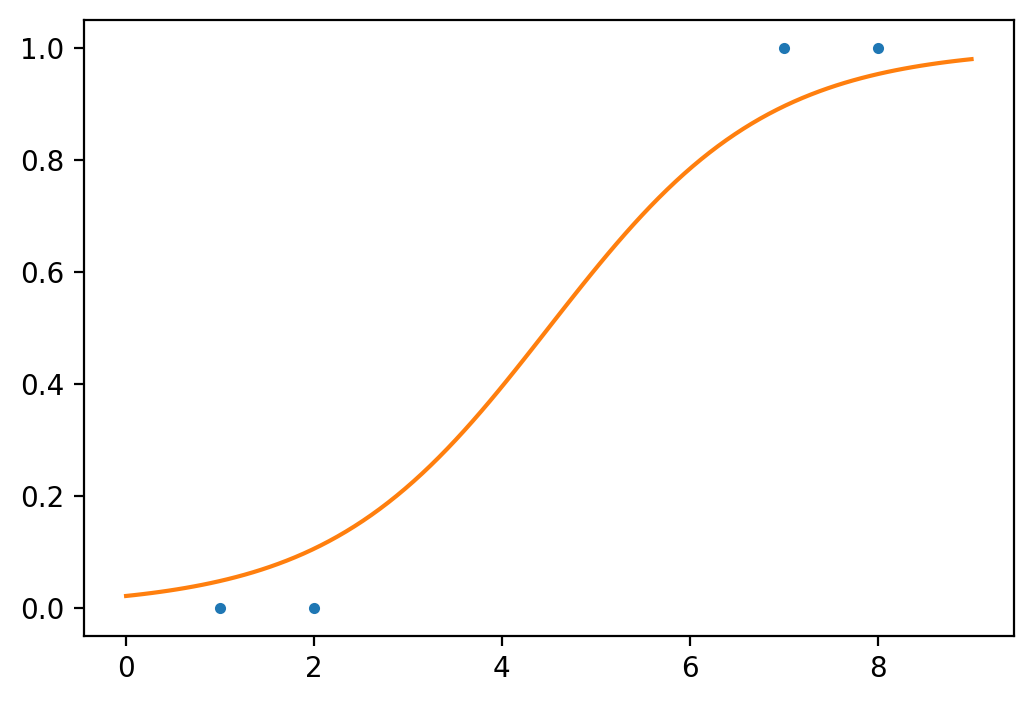

In [ ]:
fig = plt.figure(figsize=(6,4))
xs = np.linspace(0,9,101)
ys = clf.predict_proba(xs.reshape(-1,1))
plt.plot(x, y, '.')
plt.plot(xs, ys[:,1])
plt.show()

## 手書き数字画像の分類
* digitsデータセットを使う。
* ただし、digitsデータセットは10値分類なので・・・
* 今回は、「0」かそうでないかの、2値分類問題を、ロジスティック回帰で解く。

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
digits.data.shape

(1797, 64)

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

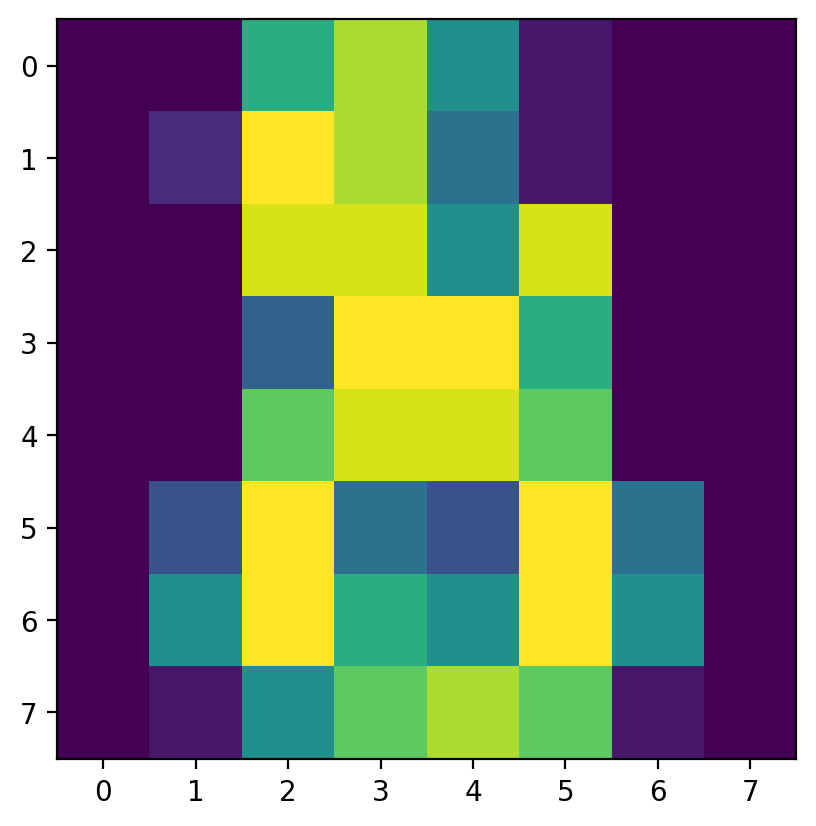

In [ ]:
plt.imshow(digits.data[-1].reshape(8, 8));

In [ ]:
digits.target # クラスラベル

array([0, 1, 2, ..., 8, 9, 8])

### 訓練データ/検証データ/テストデータに分割

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target, test_size=0.2,
                                                    random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=0.25,
                                                      random_state=42)

print(X_train.shape, X_valid.shape, X_test.shape)

(1077, 64) (360, 64) (360, 64)


In [ ]:
np.unique(y_train) # 10クラス

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### ２値分類の問題へ変える
* 「0」であるものは正解ラベルを0、そうでないものは全て正解ラベルを1にする。

In [6]:
y_train = (y_train != 0) * 1

* クラスラベルは0と1だけになっている。

In [ ]:
np.unique(y_train)

array([0, 1])

* 検証データとテストデータも同様にラベルを変更する。

In [7]:
y_valid = (y_valid != 0) * 1
y_test = (y_test != 0) * 1

### ロジスティック回帰で２値分類

* ロジスティック回帰の予測の式
 * $i$番目のデータについて、以下の式で、0/1の２値ラベルを予測する。
$$ p_i = \frac{1}{1 + e^{ - ( \beta_0 + \beta_1 x_{i,1} + \cdots + \beta_d x_{i, d} ) }} $$

* 真のラベル$t_i$とのズレを表す式
$$ - \{ t_i \log p_i + ( 1 - t_i ) \log (1 - p_i) \} $$
 * この式の値を全てのデータ点にわたって足し合わせたものを最小化する。

* モデルを準備し、訓練データを渡して係数と切片を推定させる。

In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

* `max_iter`を増やしてみる

In [9]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
print(f'Accuracy: {clf.score(X_valid, y_valid):.4f}')

Accuracy: 1.0000


In [ ]:
clf.predict([X_valid[10]])

array([0])

In [ ]:
y_valid[10]

0

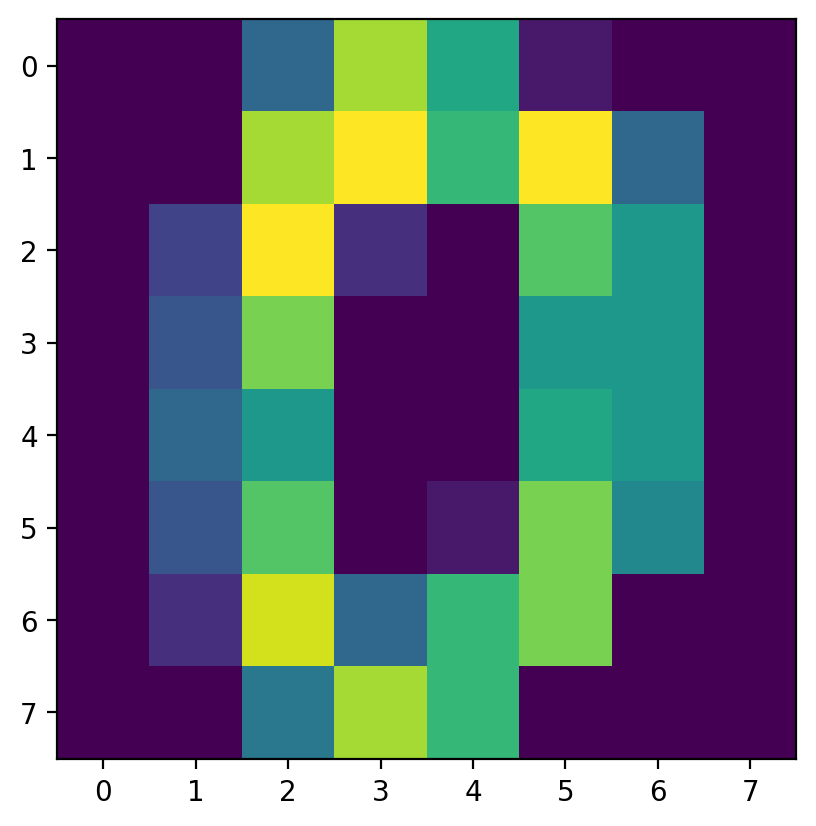

In [ ]:
plt.imshow(X_valid[10].reshape(8,-1));

* digitsデータを0とそれ以外の2値分類にしてしまうと、問題として簡単になってしまうらしい・・・。

# 応用：MNISTデータの分類

* 28ピクセル✖️28ピクセル

### データの３分割とEDA

* scikit-learnに用意されている仕組みを利用してMNISTデータをダウンロードする。

In [13]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
(70000,)


In [14]:
X, y = mnist.data, mnist.target
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


* 通常、MNISTデータは最後の10000件をテストデータとして使う。

In [15]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [18]:
X_test.shape

(10000, 784)

* テストデータ以外の60000件を、訓練データ50000件と検証データ10000件へ分割しておく。

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=10000,
                                                      random_state=42)

In [20]:
print(X_train.shape, X_valid.shape, X_test.shape)

(50000, 784) (10000, 784) (10000, 784)


* 訓練データから一つの画像を眺めてみる。

In [25]:
type(X_train.values)

numpy.ndarray

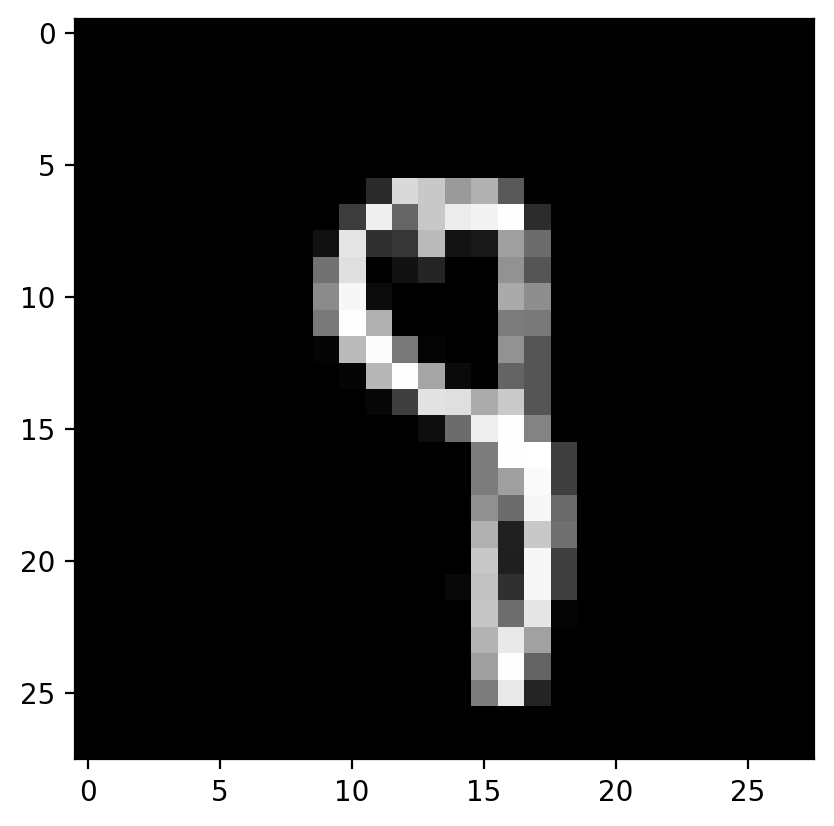

In [26]:
plt.imshow(X_train.values[0].reshape(28, -1), cmap=plt.cm.gray);

In [27]:
y_train.values[0]

'8'

* 訓練データの最初の100個を可視化してみる。

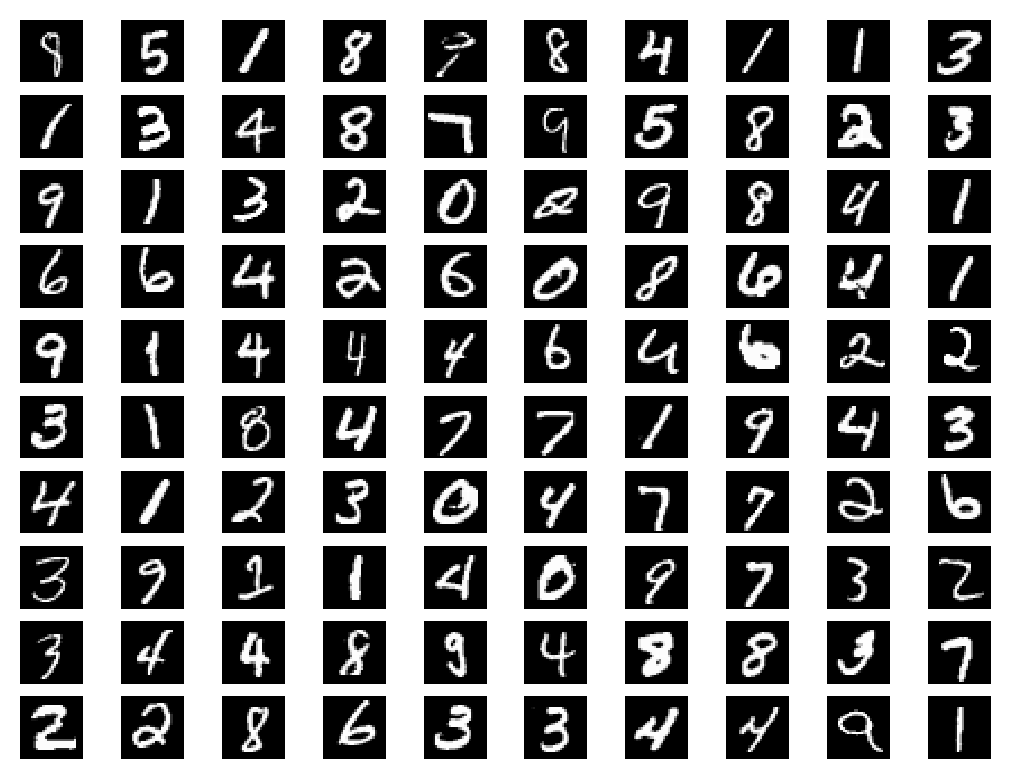

In [28]:
fig, axes = plt.subplots(10, 10)
for x, ax in zip(X_train.values, axes.ravel()):
  ax.axis('off') # 軸を消す
  ax.matshow(x.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

* 問題を２値分類問題に変える。
 * 0とそれ以外の2値分類問題にしてしまう。
 * '0' --> 0
 * '1', ..., '9' --> 1

In [29]:
y_train = (y_train != '0') * 1
y_valid = (y_valid != '0') * 1
y_test = (y_test != '0') * 1

In [30]:
print(f'{(y_train == 0).sum()} zero digits and {(y_train == 1).sum()} non-zero digits in training set')

4939 zero digits and 45061 non-zero digits in training set


## ロジスティック回帰による分類の実行
* ロジスティック回帰を準備し、訓練データを渡して係数と切片を推定させる。
 * 訓練データの個数が多いので、少し時間がかかる。
 * 推定計算が収束しない場合は、`max_iter`を増やしてみる（デフォルトの設定は`max_iter=100`）。
 * `solver`（最適化アルゴリズムの設定）を`'saga'`にしているのは、こうしないと時間がかかってしまうため。

## ロジスティック回帰での正則化
* scikit-learnのロジスティック回帰では、`C`というパラメータを調整する。
* `C`は、小さいほど、正則化が強く効く＝係数をより強くゼロに近づける。
 * デフォルトの設定は`C=1.0`。
 * リッジ回帰やLassoの`alpha`とは、向きが逆であることに、注意。
* 正則化の種類は`penalty`を`'l2'`か`'l1'`に設定することでおこなう。
 * `l2`だと、係数の二乗の和を最小化する。
 * `l1`だと、係数の絶対値の和を最小化する。

* l2: 線形回帰でいえばRidge回帰の正則化に似ている
* l1: 線形回帰でいえばLassoの正則化に似ている

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2', C=1.0, solver='saga')
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

* 検証データで評価
 * テストデータは最終評価で一回使うだけです。

In [32]:
print(f'Accuracy: {clf.score(X_valid, y_valid):.4f}')

Accuracy: 0.9909


* 推定された係数を可視化してみる。

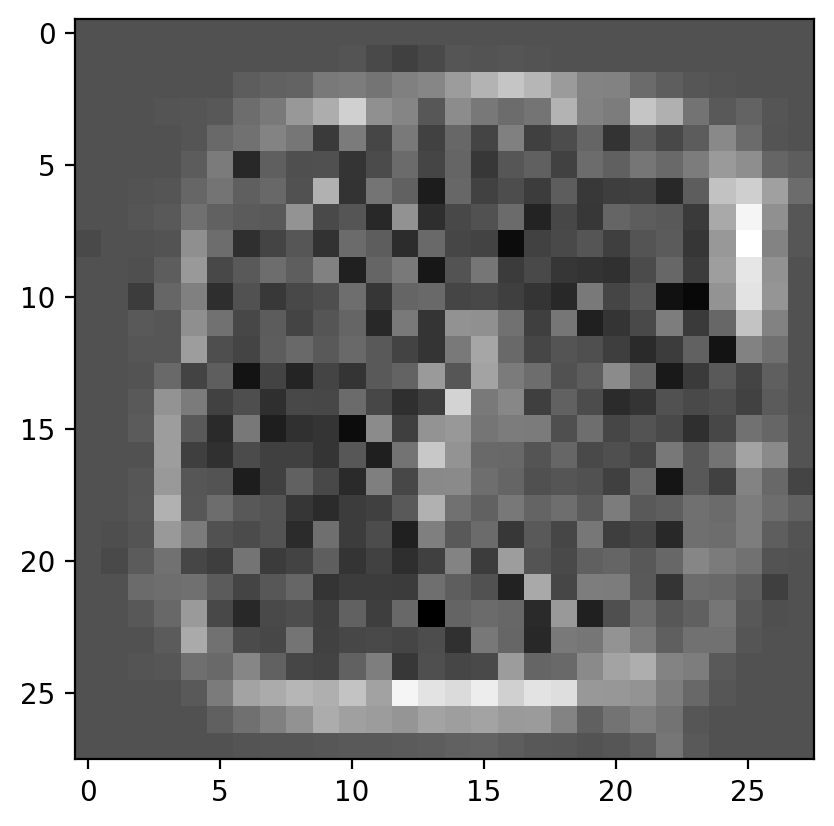

In [33]:
plt.imshow(clf.coef_.reshape(28,28), cmap=plt.cm.gray);

## 今回の設定をテストデータ上で評価

In [34]:
X_train_valid = np.concatenate([X_train, X_valid])
y_train_valid = np.concatenate([y_train, y_valid])

In [35]:
clf = LogisticRegression(penalty='l2', C=1.0, solver='saga')
clf.fit(X_train_valid, y_train_valid)
print(f'Accuracy: {clf.score(X_test, y_test):.4f}')

Accuracy: 0.9934


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# 課題
* 上に示したテスト性能よりも良い性能になるよう、
 * モデルの設定を調整して、
 * X_trainにモデルをfitさせ、
 * X_validで評価する、
* ということを繰り返し行なってみてください。
* 最後にX_testで評価するのを、忘れずに。